# Summarizing Two Quantitative Variables

Now we'll discuss ways to summarize and visualize relationships between two quantitative variables. We'll use the Ames housing data set as an example.

In [1]:
import pandas as pd

In [2]:
df_ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")
df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Visualization

Let's start by visualizing the relationship between the square footage ("Gr Liv Area") and the sale price, both of which are quantitative variables. To do this, we can make a **scatterplot**. In a scatterplot, each observation is represented by a point. The $(x, y)$ coordinates of each point represent the values of two variables for that observation.

To make a scatterplot in `pandas`, we use the `.plot.scatter()` method of `DataFrame`, specifying which variable is $x$ and which variable is $y$.

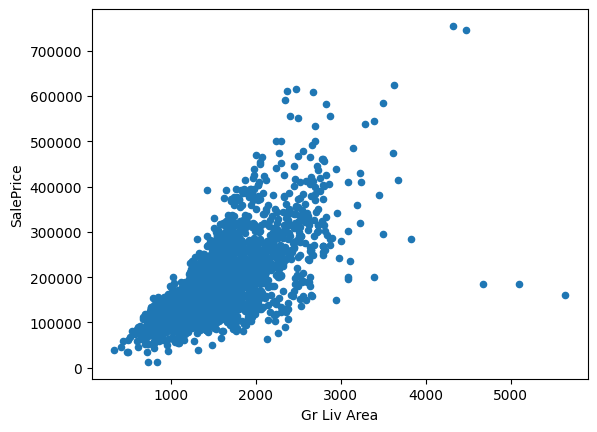

In [3]:
df_ames.plot.scatter(x="Gr Liv Area", y="SalePrice");

We see that square footage (of the dwelling) and the sale price have a positive association. That is, houses with large values of square footage tend to have large selling prices; houses with small values of square footage tend to have small selling prices.

We can pass many parameters into `scatter` to customize the appearance. For example, `alpha` controls the degrees of transparency.

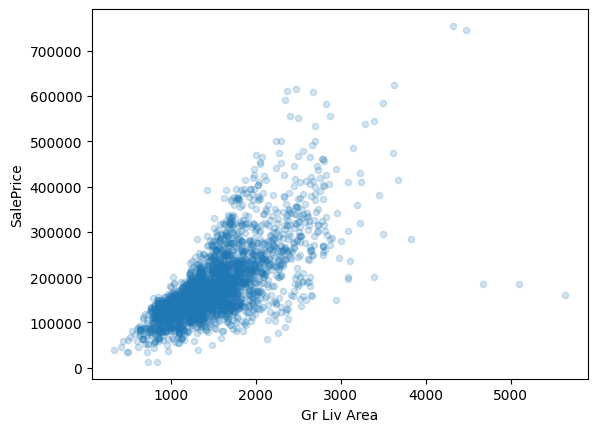

In [4]:
df_ames.plot.scatter(x="Gr Liv Area", y="SalePrice", alpha = 0.2);

## Covariance

To summarize the relationship between two quantitative variables $X$ and $Y$, we can report the _covariance_ between them, defined as

$$ \text{Cov}[X, Y] = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)$$

So the covariance is the average of the products of the paired deviations from the mean. Imagine that for each observation you make a rectangle whose sides are equal to the deviations from the mean (which could be positive or negative). Then the covariance is the average area of these rectangles (where the "area" is negative if exactly one of the deviations is negative). (As with variance, is usually doesn't make much difference in practice if you divide by $n$ or $n-1$ when taking the average.)


The sign of the covariance will match the direction of the relationship between the two variables. The figures below illustrate why. If two variables are positively related, then the scatterplot might look as follows, with most points in the upper-right and lower-left quadrants (when you divide up the plane into four quadrants based on the means of $X$ and $Y$).

![](https://github.com/dlsun/pods/blob/master/03-Quantitative-Data/positive_cov.png?raw=1)

Each point on this scatterplot contributes to the sum that makes up the covariance. Any point in the upper-right quadrant (where $x$ and $y$ are both greater than their respective means) has a positive contribution, since the product of two positive numbers is positive. A point in the lower-left quadrant (where $x$ and $y$ are both less than their respective means) also has a positive contribution, since the product of two negative numbers is also positive. Therefore, on the whole, the covariance will be positive for two variables with a positive relationship.

We can also consider two variables with a negative relationship. A scatterplot of two negatively-related variables might look as follows, with most points in the upper-left and lower-right quadrants. Points in both of these quadrants will have a negative contribution towards the covariance, since the product of a positive and a negative number is negative.

![](https://github.com/dlsun/pods/blob/master/03-Quantitative-Data/negative_cov.png?raw=1)

What does it mean for the covariance to be _zero_? It does NOT necessarily mean that there is _no_ relationship at all between the two variables. A covariance of 0 just means that the two variables do not follow an overall positive or negative association. For example, the two variables below have _zero_ covariance because the negative contributions from the upper-left and lower-right quadrants perfectly cancel out the positive contributions from the upper-right and lower-left quadrants. However, it would be inaccurate to say that $X$ and $Y$ have _no_ relationship; they have a strong relationship, but it just is not consistently in one direction.

![](https://github.com/dlsun/pods/blob/master/03-Quantitative-Data/zero_cov.png?raw=1)

To calculate the covariance between two quantitative variables, we use the `.cov()` method in `pandas`. This method is attached to one `Series` and takes another `Series` of the same length as input. It returns the covariance between the two `Series`.

In [5]:
df_ames["Gr Liv Area"].cov(df_ames["SalePrice"])

28542199.568276517

The covariance between the two variables is positive, as should be apparent from the scatterplot above. Larger houses sell for higher prices.

Be careful when using `cov` as above; it assumes the observations are in the same order in the two Series so that the $(x, y)$ pairs make sense.

If we call `cov` on the DataFrame with both variables, we get the covariance matrix. The offdiagonal entries are covariances; the diagonal entries are variances.

In [6]:
df_ames[["Gr Liv Area", "SalePrice"]].cov()

,Gr Liv Area,SalePrice
Gr Liv Area,2.555392e+05,2.854220e+07
SalePrice,2.854220e+07,6.381884e+09


## Correlation

One criticism of the covariance is that the value itself is difficult to interpret, and covariances are not comparable across different variables.  Instead we often use a "standardize covariance", called the **correlation** (or correlation coefficient) which is symbolized with $r$:

$$ r = \frac{\text{Cov}[X, Y]}{\text{SD}[X] \text{SD}[Y]} $$

The correlation has all of the important properties of covariance:

- A positive correlation indicates a positive relationship between the variables. As one increases, the other tends to increase as well.
- A negative correlation indicates a negative relationship between the variables. As one increases, the other tends to decrease.
- A zero correlation means that the two variables do not have an overall positive or negative association, but does not necessarily mean that they have _no_ relationship.

But the correlation is also guaranteed to be between $-1$ and $1$, so it can be compared across data sets.

What does a maximal correlation of $\pm 1$ mean? It means that the data fall perfectly along a line.

![](https://github.com/dlsun/pods/blob/master/03-Quantitative-Data/corr_1.png?raw=1)

Correlation is calculated in `pandas` in much the same way that covariance is, using the `.corr()` method:

In [7]:
df_ames["Gr Liv Area"].corr(df_ames["SalePrice"])

0.7067799209766278

Like the covariance, the correlation $r$ is positive, but is normalized to be between $-1$ and $+1$. $r=+1$ would mean that all of the points on the scatterplot fell perfectly along a line (with positive slope). Although the points in the scatterplot do not all fall perfectly on a line, they do seem to hover around an underlying line. This explains why the correlation is close to, but not equal to, $1$.

If we call `corr` on the DataFrame with both variables, we get the correlation matrix. The offdiagonal entries are correlations; the diagonal entries are 1 because each variable has a perfect relationship with itself.

In [8]:
df_ames[["Gr Liv Area", "SalePrice"]].corr()

,Gr Liv Area,SalePrice
Gr Liv Area,1.00000,0.70678
SalePrice,0.70678,1.00000


For more than two variables, the correlation matrix contains the correlations between each pair of variables. Remember that we previously considered the log of Lot Area. Let's add that to the correlation matrix.

In [9]:
import numpy as np

df_ames["log(Lot Area)"] = np.log(df_ames["Lot Area"])

In [10]:
df_ames[["Gr Liv Area", "SalePrice", "log(Lot Area)"]].corr()

,Gr Liv Area,SalePrice,log(Lot Area)
Gr Liv Area,1.000000,0.706780,0.378379
SalePrice,0.706780,1.000000,0.365076
log(Lot Area),0.378379,0.365076,1.000000


A scatterplot matrix displays scatterplots for each pair of variables for several quantitative variables. Histograms of each variable can be plotted on the diagonal.

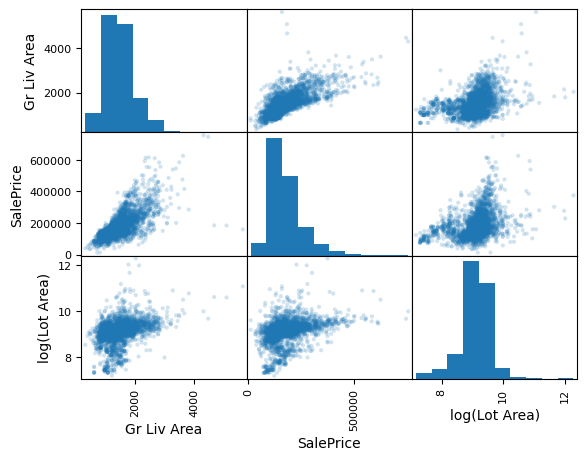

In [11]:
pd.plotting.scatter_matrix(df_ames[["Gr Liv Area", "SalePrice", "log(Lot Area)"]], alpha = 0.2);